The transcript introduces and explains **HyDE (Hypothetical Document Embeddings)**, a novel method for dense retrieval that can improve Retrieval-Augmented Generation (RAG) systems. Let me summarize and break it down for you:

---

### **What is HyDE?**
HyDE (Hypothetical Document Embeddings) is a dense retrieval method that uses a **large language model (LLM)** to create hypothetical answers for a query. Instead of directly embedding the query to search a database, HyDE embeds the generated answer (or answers) and performs the search based on this hypothetical content.

---

### **Why Use HyDE?**
1. **Overcomes Query Limitations:**  
   - Sometimes user queries lack specificity or keywords necessary for effective search.
   - Example: A query like *"What are their best-selling items?"* (referring to McDonald's) does not contain specific terms like *"food," "burgers,"* or *"Big Mac,"* making direct query embeddings ineffective.

2. **Better Context Understanding:**  
   - The LLM-generated hypothetical answer fills in the missing context and provides a richer semantic representation for embeddings.

3. **Improved Search Accuracy:**  
   - By embedding the hypothetical answer (which includes contextually relevant terms), HyDE increases the likelihood of retrieving accurate documents.

---

### **How Does HyDE Work?**
#### **Steps in the Process:**
1. **Input Query:**  
   - A user query is provided, e.g., *"What are their best-selling items?"*

2. **LLM Generates a Hypothetical Answer:**  
   - The LLM writes an answer based on its knowledge and understanding.  
   - Example: *"McDonald's is a fast food chain known for items like Big Mac, fries, and shakes."*  
   - Even if the generated answer is **wrong or incomplete**, it contains relevant terms like *"Big Mac"* and *"fries."*

3. **Embedding the Hypothetical Answer:**  
   - The hypothetical answer is transformed into a vector (embedding) using an embedding model (e.g., OpenAI embeddings, BGE embeddings).

4. **Similarity Search:**  
   - The embedding of the hypothetical answer is compared with the embeddings of stored documents in the vector database.
   - This "answer-to-answer" similarity search is often more effective than "query-to-answer" searches.

---

### **Key Features of HyDE:**
1. **Answer-to-Answer Matching:**  
   - Instead of directly matching the query to stored documents, the system matches the hypothetical answer to the stored embeddings.

2. **Multiple Hypothetical Answers:**  
   - You can generate multiple hypothetical answers for a single query and average their embeddings to improve robustness.

3. **Custom Prompts:**  
   - The LLM's behavior can be guided using custom prompts to generate domain-specific hypothetical answers.
   - Example: If you know the query is about McDonald’s, you could use a prompt like *"You are a McDonald’s assistant. Answer the question with a single menu item."*

4. **Adaptability with Embedding Models:**  
   - HyDE can work with any embedding model (e.g., OpenAI, local quantized embeddings).

---

### **Advantages of HyDE:**
1. **Improves Retrieval for Ambiguous Queries:**  
   - Handles vague or underspecified queries effectively.

2. **Domain-Specific Customization:**  
   - Prompts can be tailored to specific topics or industries for more accurate hypothetical answers.

3. **Combines Flexibility and Precision:**  
   - Works well with multiple embeddings and prompts, enhancing retrieval accuracy in RAG systems.

---

### **Limitations of HyDE:**
1. **Knowledge Dependency:**  
   - If the LLM lacks knowledge about the topic, it may hallucinate incorrect or irrelevant answers.
   - Example: Asking about a brand-new concept like *"LangSmith"* might yield unreliable hypothetical answers unless explicitly guided.

2. **Hallucination Risks:**  
   - Hypothetical answers can introduce unrelated or misleading terms if the query topic is too broad or unfamiliar.

3. **Increased Computational Overhead:**  
   - Generating hypothetical answers and embedding them requires additional LLM and embedding model calls, which can increase cost and latency.

---

### **Code Workflow:**
1. **Setup:**
   - Use an LLM (e.g., OpenAI) for hypothetical answer generation.
   - Use an embedding model (e.g., BGE embeddings) for similarity search.

2. **LLM Prompting:**
   - Example: *"Please write a passage to answer the question."*
   - Custom prompts can further refine the answer generation for specific use cases.

3. **Search Process:**
   - Generate a hypothetical answer, embed it, and use the embedding for similarity-based retrieval in a vector database.

4. **Evaluation and Tuning:**
   - Adjust prompts or embedding methods to optimize retrieval for specific datasets or queries.

---

### **Practical Example:**
#### Query: *"What are their best-selling items?"*
- **Without HyDE:**  
   - Direct embedding of the query might fail to retrieve relevant results, as key terms like *"food," "Big Mac,"* or *"fries"* are missing.
   
- **With HyDE:**  
   - The LLM generates a hypothetical answer like:  
     *"McDonald's is a fast food chain known for its Big Mac, fries, and shakes."*
   - This enriched embedding improves the chances of retrieving documents related to *Big Mac* or *fries.*

---

### **When to Use HyDE?**
- Use HyDE for:
  - Queries lacking specific details.
  - Scenarios where embeddings alone fail to capture context.
- Avoid HyDE for:
  - Niche topics unknown to the LLM.
  - Applications requiring strict factual accuracy.

---

Let me know if you'd like me to elaborate on any part or help with implementing this in your project! 😊

ठीक है! चलो इसे हिंदी में समझाते हैं। 😊

---

### **HyDE (Hypothetical Document Embeddings) क्या है?**

HyDE एक **कन्सेप्ट** है जो "Precise Zero-Shot Dense Retrieval Without Relevance Labels" नामक पेपर से लिया गया है।  
यह dense retrieval (semantic search या similarity search) को और बेहतर बनाने का तरीका है।  
आमतौर पर, dense retrieval में **query embedding** (प्रश्न का embedding) को documents के embeddings के साथ compare किया जाता है। लेकिन HyDE इससे थोड़ा अलग और ज्यादा स्मार्ट तरीके से काम करता है।  

---

### **HyDE कैसे काम करता है?**

1. **Query Input करें:**
   - किसी भी query (प्रश्न) को सिस्टम में डालें। उदाहरण के लिए:  
     - "McDonald's का सबसे अच्छा item क्या है?"
     - ध्यान दें, यहां query में "burger" या "food" जैसे keywords नहीं हैं।

2. **LLM (Large Language Model) का उपयोग:**  
   - Query को सीधे embeddings में बदलने के बजाय, हम LLM (जैसे GPT-4) से hypothetical (काल्पनिक) जवाब लिखवाते हैं।  
   - उदाहरण:  
     - LLM जवाब देता है:  
       "McDonald's के सबसे लोकप्रिय items में Big Mac, फ्रेंच फ्राइज़, और शेक्स शामिल हैं।"

3. **Embedding Generate करें:**  
   - अब इस hypothetical जवाब से embedding बनाई जाती है, जो query से कहीं ज्यादा informative होती है।  
   - क्योंकि अब embedding में **Big Mac**, **fries**, और **burgers** जैसे keywords शामिल होंगे।

4. **Similarity Search करें:**  
   - इस embedding का उपयोग document chunks से similarity ढूंढने के लिए किया जाता है।  
   - अब document से related सही और बेहतर answer मिलेगा।

---

### **क्यों जरूरी है HyDE?**

#### **1. Query में जरूरी details नहीं होतीं (Context समझाना):**
   - Query में कई बार keywords नहीं होते।  
   - जैसे: "McDonald's का बेस्टसेलिंग आइटम क्या है?"  
   - Query में "burger" या "food" नहीं लिखा है।  
   - Embedding मॉडल इससे confuse हो सकता है और सही document नहीं ढूंढ पाता।  
   - लेकिन LLM hypothetical जवाब में context जोड़ देता है।

#### **2. Answer-to-Answer Similarity:**
   - आमतौर पर **query-to-answer similarity** पर काम किया जाता है।  
   - HyDE में hypothetical answer से embedding बनाकर **answer-to-answer similarity** पर काम होता है।  
   - यह ज्यादा accurate होता है।

---

### **कहाँ अच्छा काम करता है?**

1. **Broad Knowledge Topics:**  
   - McDonald's जैसा example, जहां LLM को context पहले से पता है।  
   - जैसे: "McDonald's बर्गर बेचता है।"  
   - Query को refine करके embedding और answer ढूंढने में मदद मिलती है।

2. **Custom Prompts:**  
   - आप LLM को guide करने के लिए prompt को customize कर सकते हैं।  
   - उदाहरण:  
     - "आप McDonald's के menu expert हैं। कृपया सबसे अच्छा food item बताएं।"  
     - LLM एक छोटा जवाब देगा: "Big Mac।"

3. **Multiple Answers:**
   - एक से ज्यादा hypothetical जवाब generate करके उनके embeddings को combine किया जा सकता है।  
   - यह search को और बेहतर बनाता है।

---

### **कहाँ सावधानी बरतनी चाहिए?**

1. **नई जानकारी (Unfamiliar Topics):**  
   - अगर topic बिल्कुल नया हो, और LLM को इसके बारे में कुछ भी न पता हो, तो यह hallucinate कर सकता है।  
   - जैसे: "LangSmith क्या है?"  
   - LLM कह सकता है: "LangSmith एक language learning software है।"  
   - लेकिन यह गलत है।  
   - ऐसे मामलों में HyDE कम काम करता है।

2. **Overly Guided Prompts:**  
   - अगर prompts सही नहीं हैं, तो LLM गलत दिशा में जा सकता है।  
   - इसलिए prompts को सही तरीके से set करना जरूरी है।

---

### **Code में HyDE कैसे लागू करें?**

1. **Embedding Model चुनें:**  
   - जैसे OpenAI embeddings, BGE embeddings, या local embeddings।  

2. **LLM Chain बनाएं:**  
   - LangChain framework का उपयोग करके LLM और embedding मॉडल को जोड़ें।  

3. **Custom Prompts इस्तेमाल करें:**  
   - User के सवालों को ध्यान में रखते हुए prompts को customize करें।  
   - Example Prompt: "सिर्फ एक food item का नाम बताएं।"  

4. **Multiple Hypothetical Answers:**  
   - एक query के लिए 3-4 hypothetical जवाब generate करें और उनके embeddings को combine करें।  

5. **Search Perform करें:**  
   - अब hypothetical embeddings को document embeddings के साथ compare करके similarity ढूंढें।

---

### **HyDE का फायदा?**

- Query में keywords की कमी होने पर भी सही answer ढूंढता है।  
- Context को बेहतर तरीके से समझता है।  
- Customization और flexibility देता है।  

---

### **Example:**  

#### Query:  
"बेस्टसेलिंग आइटम क्या है?"

#### LLM Answer:  
"McDonald's का बेस्टसेलिंग आइटम Big Mac है।"  

#### Embedding:  
अब embedding में **Big Mac**, **fries**, और **burger** जैसे keywords होंगे, जिससे related documents आसानी से मिल जाएंगे।  

---

### **निष्कर्ष:**  
HyDE एक simple लेकिन powerful technique है। इसे अपने RAG (Retrieval-Augmented Generation) सिस्टम में integrate करके results को बेहतर बनाया जा सकता है।  

अगर कुछ unclear हो, तो पूछो! 😊

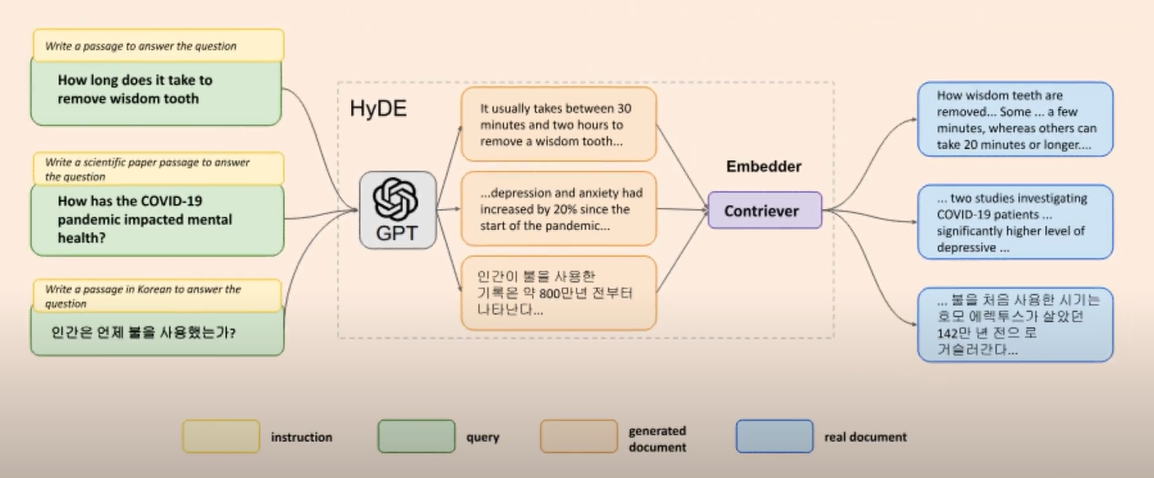

Answer to Document Vector(embedding) similarity search : HyDE

In general: RAG me: Query to Document vector similarity find kiya jata hai. But HyDE RAG me user dvara diye gye input se phle LLM dvara koi response banvaya jata hai, fir is response/answer se doument me similarty search krte hain.

This Hypothetical Document Embeddings is quite useful in cases when ther is lack of clarity in the user-query.

In [1]:
!pip -q install langchain huggingface_hub openai chromadb tiktoken faiss-cpu langchain-google-genai
!pip -q install sentence_transformers
!pip -q install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 87.5 MB/s eta 0:00:00


In [2]:
!mkdir -p blog_posts
!unzip -q /content/langchain_blog_posts.zip -d blog_posts

In [4]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API key here")

Provide your Google API key here··········


# Hypothetical Document Embeddings (HyDE)

modified from - https://github.com/langchain-ai/langchain/tree/master/cookbook

HyDE creates a "Hypothetical" answer with the LLM and then embeds that for search

HyDE = Base Embedding model+ LLM Chain (with prompts)

In [5]:
!pip -q install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.1 MB/s eta 0:00:00


In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI

from langchain.chains import LLMChain, HypotheticalDocumentEmbedder
from langchain.prompts import PromptTemplate

from langchain_community.document_loaders import TextLoader
import langchain

## BGE Embeddings

In [8]:
from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en-v1.5"
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity

bge_embeddings = HuggingFaceBgeEmbeddings(
    model_name = model_name,
    encode_kwargs = encode_kwargs
)

In [36]:
# set up llm
# llm = OpenAI()

llm = ChatGoogleGenerativeAI(
    model = "gemini-2.0-flash-exp",
    temperature = 0
)

In [10]:
# Load with `web_search` prompt
embeddings = HypotheticalDocumentEmbedder.from_llm(llm,
                                                   bge_embeddings,
                                                   prompt_key = "web_search"
                                                   )

In [14]:
embeddings.llm_chain.get_prompts()

[PromptTemplate(input_variables=['QUESTION'], input_types={}, partial_variables={}, template='Please write a passage to answer the question \nQuestion: {QUESTION}\nPassage:')]

SEE **Please write a passage to answer the question**

In [15]:
langchain.debug = True

In [16]:
import warnings

warnings.filterwarnings("ignore")

In [17]:
# Now we can use it as any embedding class!
result = embeddings.embed_query("What items does McDonalds make?")

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "QUESTION": "What items does McDonalds make?"
}
[chain/start] [chain:RunnableSequence > prompt:PromptTemplate] Entering Prompt run with input:
{
  "QUESTION": "What items does McDonalds make?"
}
[chain/end] [chain:RunnableSequence > prompt:PromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "Human: Please write a passage to answer the question \nQuestion: What items does McDonalds make?\nPassage:"
  ]
}
[llm/end] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] [1.56s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "McDonald's is primarily known for its fast-food offerings. Their menu features a variety of **burgers**, including the iconic Big Mac and Quarter Pounder. They also produce **chicken sandwiches**, such as the McChicken and various crispy chi

## Multiple generations
We can also generate multiple documents and then combine the embeddings for those. By default, we combine those by taking the average. We can do this by changing the LLM we use to generate documents to return multiple things.

In [19]:
multi_llm = ChatGoogleGenerativeAI(
    model = "gemini-2.0-flash-exp",
    temperature = 0,
    n = 4
)

In [20]:
embeddings = HypotheticalDocumentEmbedder.from_llm(
    multi_llm, bge_embeddings, "web_search"
)

In [21]:
result = embeddings.embed_query("What is McDonalds best selling item?")

[chain/start] [chain:RunnableSequence] Entering Chain run with input:
{
  "QUESTION": "What is McDonalds best selling item?"
}
[chain/start] [chain:RunnableSequence > prompt:PromptTemplate] Entering Prompt run with input:
{
  "QUESTION": "What is McDonalds best selling item?"
}
[chain/end] [chain:RunnableSequence > prompt:PromptTemplate] s] Exiting Prompt run with output:
[outputs]
[llm/start] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "Human: Please write a passage to answer the question \nQuestion: What is McDonalds best selling item?\nPassage:"
  ]
}
[llm/end] [chain:RunnableSequence > llm:ChatGoogleGenerativeAI] [1.04s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "McDonald's best-selling item, consistently topping their global sales charts, is the **French Fries**. While the Big Mac is iconic and the Chicken McNuggets are incredibly popular, the simple, salty, and satisfying French Fry 

## Using our own prompts
Besides using preconfigured prompts, we can also easily construct our own prompts and use those in the LLMChain that is generating the documents. This can be useful if we know the domain our queries will be in, as we can condition the prompt to generate text more similar to that.

In the example below, let's condition it to generate text about a state of the union address (because we will use that in the next example).

In [37]:
prompt_template = """Please answer the user's question as a single food item
Question: {question}
Answer:"""

prompt = PromptTemplate(input_variables = ["question"], template = prompt_template)

llm_chain = LLMChain(llm = llm, prompt = prompt)

In [38]:
embeddings = HypotheticalDocumentEmbedder(
    llm_chain = llm_chain,
    base_embeddings = bge_embeddings
)

In [39]:
result = embeddings.embed_query(
    "What is is McDonalds best selling item?"
)

KeyError: 'required'

**If we would have used OpenAI() as our llm, output aa gya hota:**
```
[llm/start] [1:llm:OpenAI] Entering LLM run with input:
{
  "prompts": [
    "Please answer the user's question as a single food item\nQuestion: What is is McDonalds best selling item?\nAnswer:"
  ]
}
[llm/end] [1:llm:OpenAI] [211ms] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": " Big Mac",
        "generation_info": {
          "finish_reason": "stop",
          "logprobs": null
        }
      }
    ]
  ],
  "llm_output": {
    "token_usage": {
      "prompt_tokens": 26,
      "completion_tokens": 2,
      "total_tokens": 28
    },
    "model_name": "text-davinci-003"
  },
  "run": null
}
```

In [40]:
class CustomHypotheticalDocumentEmbedder(HypotheticalDocumentEmbedder):
    def embed_query(self, query):
        try:
            # Use the parent class's method
            return super().embed_query(query)
        except KeyError as e:
            if str(e) == "'required'":
                # Handle the missing 'required' key
                input_schema = self.llm_chain.input_schema.model_json_schema()
                required_keys = input_schema.get("required", [])
                print("Handled missing 'required' key, using:", required_keys)
                # Retry or adjust the query embedding process as needed
                return self.llm_chain.run({"question": query})
            else:
                raise

# Use the custom embedder class
embeddings = CustomHypotheticalDocumentEmbedder(
    llm_chain=llm_chain,
    base_embeddings=bge_embeddings
)

# Try embedding the query
result = embeddings.embed_query("What is McDonald's best selling item?")
print(result)


Handled missing 'required' key, using: []
[chain/start] [chain:LLMChain] Entering Chain run with input:
{
  "question": "What is McDonald's best selling item?"
}
[llm/start] [chain:LLMChain > llm:ChatGoogleGenerativeAI] Entering LLM run with input:
{
  "prompts": [
    "Human: Please answer the user's question as a single food item\nQuestion: What is McDonald's best selling item?\nAnswer:"
  ]
}
[llm/end] [chain:LLMChain > llm:ChatGoogleGenerativeAI] s] Exiting LLM run with output:
{
  "generations": [
    [
      {
        "text": "Big Mac\n",
        "generation_info": {
          "finish_reason": "STOP",
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE",
              "blocked": false
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE",
              "blocked": false
            },
            {
              "cate

This code extends the `HypotheticalDocumentEmbedder` by overriding the `embed_query` method to handle cases where the `required` key is missing from the input schema. It gracefully catches the `KeyError`, provides a fallback for the missing schema key, and continues the embedding process, ensuring compatibility with the `ChatGoogleGenerativeAI` model.

In [42]:
result

'Big Mac\n'

In [55]:
class CustomHypotheticalDocumentEmbedder(HypotheticalDocumentEmbedder):
    def embed_query(self, query):
        try:
            # Use the parent class's method to get embeddings
            return super().embed_query(query)
        except KeyError as e:
            if str(e) == "'required'":
                # Handle the missing 'required' key
                input_schema = self.llm_chain.input_schema.model_json_schema()
                required_keys = input_schema.get("required", [])
                print("Handled missing 'required' key, using:", required_keys)

                # Use base embeddings to directly embed the query as a fallback
                return self.base_embeddings.embed_query(query)
            else:
                raise

# Use the custom embedder class
embeddings = CustomHypotheticalDocumentEmbedder(
    llm_chain=llm_chain,
    base_embeddings=bge_embeddings
)

# Try embedding the query
result = embeddings.embed_query("What is McDonald's best selling item?")


Handled missing 'required' key, using: []


In [57]:
result[:5]

[-0.0016484778607264161,
 -0.009859087876975536,
 0.024918586015701294,
 -0.0009986711665987968,
 0.08360163122415543]

In [58]:
len(result)

384

## Using HyDE

Now that we have HyDE, we can use it as we would any other embedding class! Here is using it to find similar passages in the state of the union example.

In [43]:
from langchain.text_splitter import CharacterTextSplitter

!pip install -qU "langchain-chroma>=0.1.2"

from langchain_chroma import Chroma

# with open("../../state_of_the_union.txt") as f:
#     state_of_the_union = f.read()

loaders = [
    TextLoader('/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'),
    TextLoader('/content/blog_posts/blog.langchain.dev_benchmarking-question-answering-over-csv-data_.txt'),
    TextLoader('/content/blog_posts/blog.langchain.dev_chat-loaders-finetune-a-chatmodel-in-your-voice_.txt'),
]
docs = []
for l in loaders:
    docs.extend(l.load())

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

texts = text_splitter.split_documents(docs) #split_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.3/628.3 kB 13.5 MB/s eta 0:00:00


In [44]:
texts

[Document(metadata={'source': '/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'}, page_content='URL: https://blog.langchain.dev/announcing-langsmith/\nTitle: Announcing LangSmith, a unified platform for debugging, testing, evaluating, and monitoring your LLM applications\n\nLangChain exists to make it as easy as possible to develop LLM-powered applications.\n\nWe started with an open-source Python package when the main blocker for building LLM-powered applications was getting a simple prototype working. We remember seeing Nat Friedman tweet in late 2022 that there was “not enough tinkering happening.” The LangChain open-source packages are aimed at addressing this and we see lots of tinkering happening now (Nat agrees)–people are building everything from chatbots over internal company documents to an AI dungeon master for a Dungeons and Dragons game.'),
 Document(metadata={'source': '/content/blog_posts/blog.langchain.dev_announcing-langsmith_.txt'}, page_content='The 

In [45]:
len(texts)

43

In [59]:
prompt_template = """Please answer the user's question as related to Large Language Models
Question: {question}
Answer:"""

prompt = PromptTemplate(input_variables = ["question"], template = prompt_template)

llm_chain = LLMChain(llm=llm, prompt=prompt)

In [60]:
embeddings = HypotheticalDocumentEmbedder(
    llm_chain = llm_chain,
    base_embeddings = bge_embeddings
)

In [61]:
docsearch = Chroma.from_documents(texts, embeddings)

query = "What are chat loaders?"
docs = docsearch.similarity_search(query)

KeyError: 'required'

OpenAI() Embedding ke sath krte to ho jata:

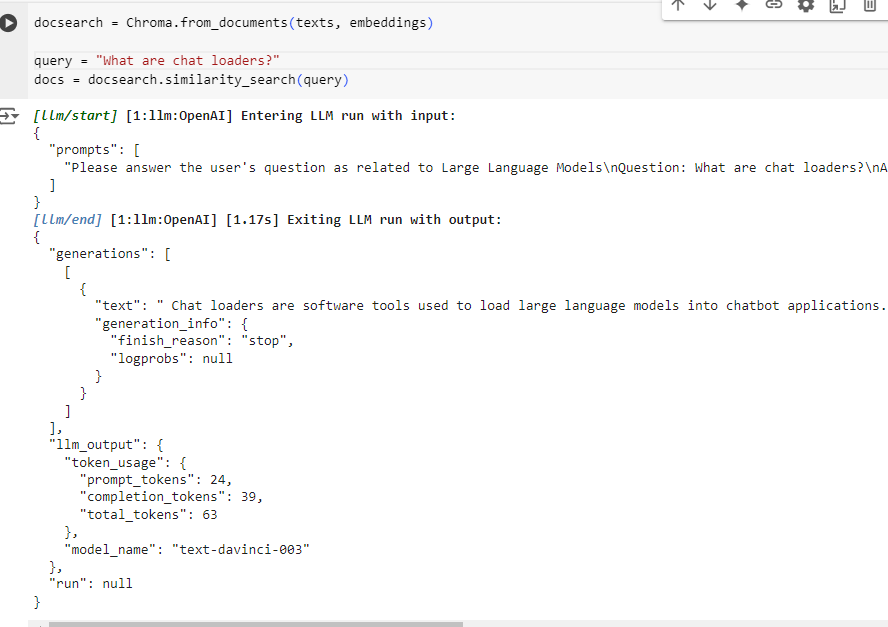

In [62]:
class CustomHypotheticalDocumentEmbedder(HypotheticalDocumentEmbedder):
    def embed_query(self, query):
        try:
            # Use the parent class's method to get embeddings
            return super().embed_query(query)
        except KeyError as e:
            if str(e) == "'required'":
                # Handle the missing 'required' key
                input_schema = self.llm_chain.input_schema.model_json_schema()
                required_keys = input_schema.get("required", [])
                print("Handled missing 'required' key, using:", required_keys)

                # Use base embeddings to directly embed the query as a fallback
                return self.base_embeddings.embed_query(query)
            else:
                raise

# Ensure embeddings use the custom handler
embeddings = CustomHypotheticalDocumentEmbedder(
    llm_chain=llm_chain,
    base_embeddings=bge_embeddings
)

# Use Chroma with the custom embeddings
docsearch = Chroma.from_documents(texts, embeddings)

# Perform similarity search
query = "What are chat loaders?"
docs = docsearch.similarity_search(query)

Handled missing 'required' key, using: []


In [63]:
docs

[Document(metadata={'source': '/content/blog_posts/blog.langchain.dev_chat-loaders-finetune-a-chatmodel-in-your-voice_.txt'}, page_content='URL: https://blog.langchain.dev/chat-loaders-finetune-a-chatmodel-in-your-voice/\nTitle: Chat Loaders: Fine-tune a ChatModel in your Voice\n\nSummary\n\nWe are adding a new integration type, ChatLoaders, to make it easier to fine-tune models on your own unique writing style. These utilities help convert data from popular messaging platforms to chat messages compatible with fine-tuning formats like that supported by OpenAI.\n\nThank you to Greg Kamradt for Misbah Syed for their thought leadership on this.\n\nImportant Links:\n\nContext\n\nOn Tuesday, OpenAI announced improved fine-tuning support, extending the service to larger chat models like GPT-3.5-turbo. This enables anyone to customize these larger, more capable models for their own use cases. They also teased support for fine-tuning GPT-4 later this year.\n\nWhile fine-tuning is typically not

In [64]:
print(docs[0].page_content)

URL: https://blog.langchain.dev/chat-loaders-finetune-a-chatmodel-in-your-voice/
Title: Chat Loaders: Fine-tune a ChatModel in your Voice

Summary

We are adding a new integration type, ChatLoaders, to make it easier to fine-tune models on your own unique writing style. These utilities help convert data from popular messaging platforms to chat messages compatible with fine-tuning formats like that supported by OpenAI.

Thank you to Greg Kamradt for Misbah Syed for their thought leadership on this.

Important Links:

Context

On Tuesday, OpenAI announced improved fine-tuning support, extending the service to larger chat models like GPT-3.5-turbo. This enables anyone to customize these larger, more capable models for their own use cases. They also teased support for fine-tuning GPT-4 later this year.

While fine-tuning is typically not advised for teaching an LLM substantially new knowledge or for factual recall; it is good for style transfer.


In [65]:
print(docs[1].page_content)

URL: https://blog.langchain.dev/chat-loaders-finetune-a-chatmodel-in-your-voice/
Title: Chat Loaders: Fine-tune a ChatModel in your Voice

Summary

We are adding a new integration type, ChatLoaders, to make it easier to fine-tune models on your own unique writing style. These utilities help convert data from popular messaging platforms to chat messages compatible with fine-tuning formats like that supported by OpenAI.

Thank you to Greg Kamradt for Misbah Syed for their thought leadership on this.

Important Links:

Context

On Tuesday, OpenAI announced improved fine-tuning support, extending the service to larger chat models like GPT-3.5-turbo. This enables anyone to customize these larger, more capable models for their own use cases. They also teased support for fine-tuning GPT-4 later this year.

While fine-tuning is typically not advised for teaching an LLM substantially new knowledge or for factual recall; it is good for style transfer.
